<a href="https://colab.research.google.com/github/KaterinaPenaloza/Tareas-Datascience/blob/main/ProyectoRedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Redes
**Integrantes:**


*   Diego Carrasco
*   Katerina Peñaloza
*   Melanie Pérez





# Presentación dataset

Para el proyecto de análisis de redes, elegimos el dataset llamado **"moreno_zebra network"**, el cual consiste en una red no dirigida que representa la interacción entre 27 cebras de Grévy en Kenya. Cada nodo representa una cebra y una arista representa que hubo interacción entre dos cebras durante el estudio.

Las columnas del dataset son:
* 1°: ID Nodo origen
* 2°: ID Nodo objetivo

Nosotros renombraremos estas columnas como "Source Zebra" y "Target Zebra" para mayor entendimiento.


# Librerías

In [ ]:
!pip install networkx
!pip install scipy matplotlib

In [ ]:
# Análisis de los datos
import pandas as pandas
import numpy as numpy
from scipy.stats import spearmanr   #Calcular coeficiente de Spearman

# Manipulación de grafos
import networkx as nx

# Formatear la salida en formato json para que sea más legible
import json

# Utilizado para las gráficas
import seaborn as sns

# Mostrar gráficas del análisis de datos
import matplotlib.pyplot as plt
from matplotlib import style

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "64"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['figure.figsize'] = 10, 6.25
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Pre-procesamiento

In [ ]:
# Subir archivo
from google.colab import files
uploaded = files.upload()

# Leer el archivo, usando como delimitación los espacios " ", nos saltamos las primeras dos filas que no sabemos como interpretarlas,
# por lo tanto las consideraremos irrelevantes, cambiamos los nombres de las columnas por Source Zebra y Target Zebra respectivamente.
df = pandas.read_csv('/content/zebra.txt', delimiter=' ',  skiprows=2,  header=None, names=['Source Zebra', 'Target Zebra'])
df

Saving zebra.txt to zebra (2).txt


,Source Zebra,Target Zebra
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6
...,...,...
106,24,26
107,24,27
108,25,26
109,25,27


## Limpieza de dataset

Este paso es para asegurarnos de que los datos estén óptimos para su procesamiento más adelante, en primer lugar eliminamos los nodos duplicados, luego eliminamos los datos con valores nulos o NaN, y finalmente nos aseguramos de que el tipo de dato sea el correcto (int).

In [ ]:
# Eliminar nodos duplicados
df.drop_duplicates(subset=['Source Zebra', 'Target Zebra'], keep='first', inplace=True)
df.drop_duplicates(subset=['Target Zebra', 'Source Zebra'], keep='first', inplace=True)

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Transformar columnas a int
df = df.astype(int)

df

,Source Zebra,Target Zebra
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6
...,...,...
106,24,26
107,24,27
108,25,26
109,25,27


# Análisis descriptivo de la red


## Medidas de centralidad



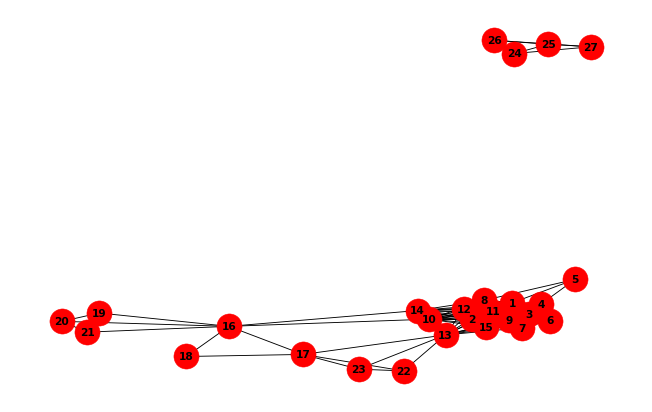

In [ ]:
# Crear un grafo desde el DataFrame
G = nx.from_pandas_edgelist(df, 'Source Zebra', 'Target Zebra')
# Visualización del grafo normal
nx.draw(G, node_color='red', node_size=800, with_labels=True, font_weight='bold')
plt.show()


## Grado

La centralidad de grado («degree centrality») es la primera y más simple de las medidas de centralidad. Indica el número de enlaces que posee un nodo con los demás.

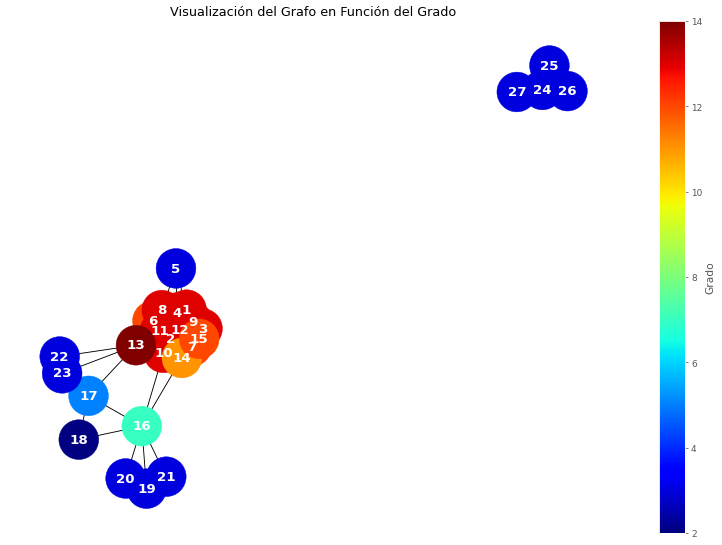

In [ ]:
# Calcular medidas de grado
degree = dict(G.degree())

# Obtener colores según el grado de cada nodo
colores = [degree[nodo] for nodo in G.nodes]

# Dibujar el grafo
pos = nx.spring_layout(G)  # Puedes cambiar el layout según tus preferencias

plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_color=colores, cmap=plt.cm.jet, node_size=2000, with_labels=True, font_size=15, font_color='white', font_weight='bold')

# Añadir barra de colores
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(degree.values()), vmax=max(degree.values())))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Grado')

plt.title('Visualización del Grafo en Función del Grado')
plt.show()

## Closeness

La medida de cercanía, se basa en calcular la suma o bien el promedio de las distancias más cortas desde un nodo hacia todos los demás. La cercanía mide de alguna forma la accesibilidad de un nodo en la red, cuando mas cercano es el acceso a los demas nodos, mas alta su valoración

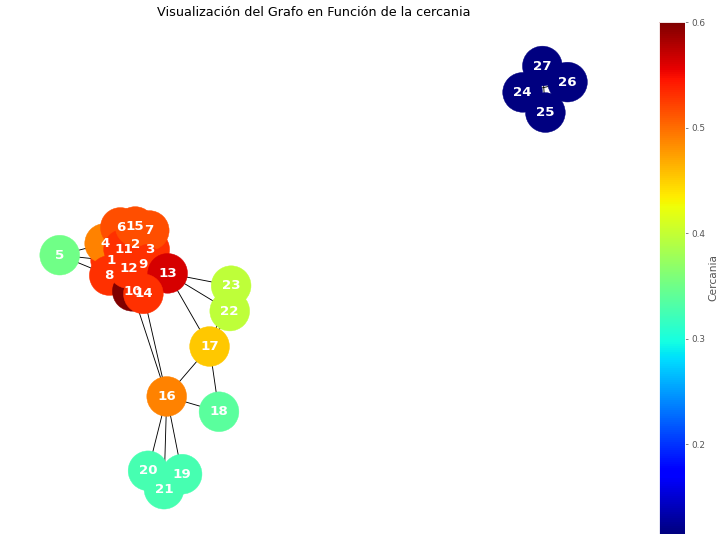

In [ ]:
# Calcular medida de cercanía (closeness)
closeness = nx.closeness_centrality(G)

# Obtener colores según el grado de cada nodo
colores = [closeness[nodo] for nodo in G.nodes]

# Dibujar el grafo
pos = nx.spring_layout(G)  # Puedes cambiar el layout según tus preferencias

plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_color=colores, cmap=plt.cm.jet, node_size=2000, with_labels=True, font_size=15, font_color='white', font_weight='bold')

# Añadir barra de colores
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(closeness.values()), vmax=max(closeness.values())))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Cercania')

plt.title('Visualización del Grafo en Función de la cercania')
plt.show()

## Betweenness
La intermediación («betweenness centrality») es una medida que cuantifica la frecuencia o el número de veces que un nodo actúa como un puente a lo largo del camino más corto entre otros dos nodos.
En otras palabras, cuantos mas nodos que necesiten pasar por mi para hacer sus conexiones indirectas por los caminos más cortos, más central seré yo.

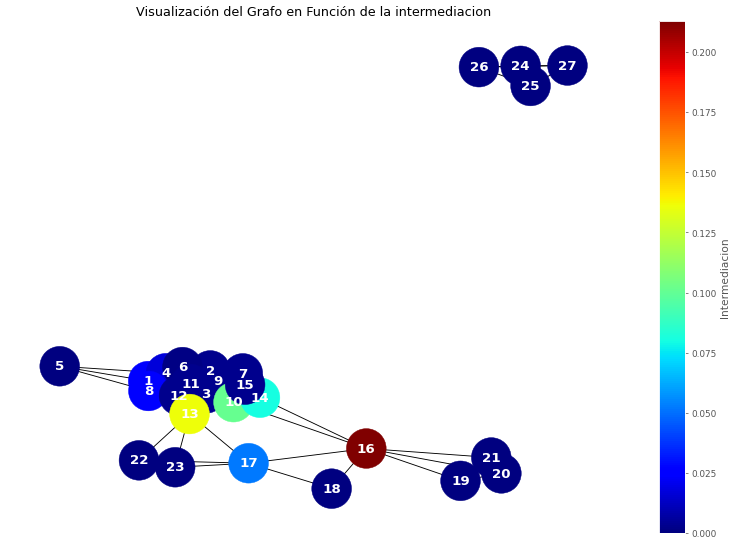

In [ ]:
# Calcular medida de intermediación (betweenness)
betweenness = nx.betweenness_centrality(G)

# Obtener colores según el grado de cada nodo
colores = [betweenness[nodo] for nodo in G.nodes]

# Dibujar el grafo
pos = nx.spring_layout(G)  # Puedes cambiar el layout según tus preferencias

plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_color=colores, cmap=plt.cm.jet, node_size=2000, with_labels=True, font_size=15, font_color='white', font_weight='bold')

# Añadir barra de colores
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(betweenness.values()), vmax=max(betweenness.values())))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Intermediacion')

plt.title('Visualización del Grafo en Función de la intermediacion')
plt.show()

## PageRank

El PageRank es un algoritmo utilizado por los motores de búsqueda para medir la importancia relativa de las páginas web en una red. Fue desarrollado por Larry Page y Sergey Brin, los fundadores de Google. El concepto básico detrás de PageRank es que una página es importante si es enlazada por otras páginas importantes. El algoritmo asigna a cada página un valor numérico llamado "PageRank" en función de la cantidad y calidad de los enlaces que apuntan hacia esa página.
En otras palabras, la dispersión de influencia es una medida que indica cómo se distribuye la importancia de un nodo a lo largo del tiempo o de iteraciones en el cálculo del PageRank.


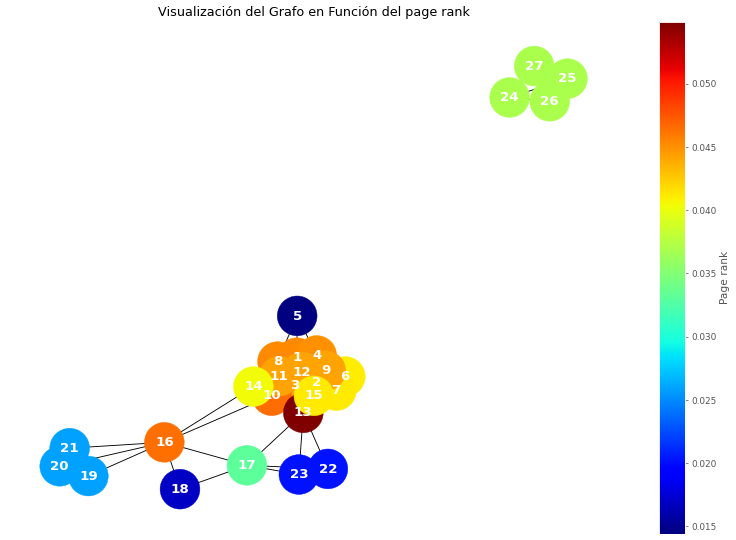

In [ ]:
# Calcular PageRank
pagerank = nx.pagerank(G)

# Obtener colores según el grado de cada nodo
colores = [pagerank[nodo] for nodo in G.nodes]

# Dibujar el grafo
pos = nx.spring_layout(G)  # Puedes cambiar el layout según tus preferencias

plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_color=colores, cmap=plt.cm.jet, node_size=2000, with_labels=True, font_size=15, font_color='white', font_weight='bold')

# Añadir barra de colores
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(pagerank.values()), vmax=max(pagerank.values())))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Page rank')

plt.title('Visualización del Grafo en Función del page rank')
plt.show()

In [ ]:
# Crear un DataFrame para almacenar las medidas
medidas_df = pandas.DataFrame({
    'Nodo': list(degree.keys()),
    'Grado': list(degree.values()),
    'Cercanía': list(closeness.values()),
    'Intermediación': list(betweenness.values()),
    'PageRank': list(pagerank.values())
})
medidas_df

,Nodo,Grado,Cercanía,Intermediación,PageRank
0,1,13,0.531868,0.024031,0.045369
1,2,13,0.531868,0.003133,0.044276
2,3,13,0.531868,0.003133,0.044276
3,4,13,0.489879,0.017254,0.044985
4,5,3,0.351234,0.000000,0.014430
5,6,12,0.517094,0.001589,0.041136
6,7,12,0.517094,0.002877,0.041281
7,8,13,0.531868,0.024031,0.045369
8,9,13,0.531868,0.003133,0.044276
9,10,13,0.600496,0.101441,0.046647


Interpretaciones generales:

1. **Grado:**
   - Los nodos (cebras) 1, 2, 3, 4, 8, 9, 10, 11, y 12 tienen un grado alto, lo que indica que están conectados con muchos otros nodos (cebras).
   - Los nodos 5, 18, 19, 20, 21, 22, 23, 24, 25, 26 y 27 tienen un grado mucho menor, lo que indica que están menos conectados en comparación con las otras cebras, incluso se puede apreciar en el grafo que las cebras 24, 25, 26 y 27 están aisladas del resto de cebras.

2. **Cercanía:**
   - Los nodos 10 y 13 tienen una cercanía relativamente alta, lo que sugiere que están cerca de muchos otros nodos en términos de distancia geodésica.
   - Los nodos 24, 25, 26 y 27 tienen una cercanía más baja, indicando que efectivamente como se puede ver en el grafo, están más alejados de los otros nodos en términos de distancia geodésica.

3. **Intermediación:**
   - El nodo 16 y 13 tienen intermediación alta, lo que nos dice que actúa como un puente entre muchos pares de nodos.
   - Los nodos 5, 18, 19, 20, 21, 22, 23, 24, 25, 26 y 27 tienen una intermediación cero, lo que indica que no están en la ruta más corta entre otros nodos.

4. **PageRank:**
   - El nodo 13 tienen el PageRank más alto, sugiriendo que es el más importante según el algoritmo PageRank.
   - El nodo 5 tiene el PageRank más bajo, por lo que sería el nodo menos importante según este algoritmo.


# Análisis correlacional de la red

## Dispersión de influencia

In [ ]:
# Función para calcular la dispersión de influencia
def calcular_dispersion(grafo, medida_centralidad, top=10):
    # Obtener el top nodos más centrales según la medida de centralidad
    nodos_top = sorted(medida_centralidad, key=medida_centralidad.get, reverse=True)[:top]
    json_dispersion = {}  # Crear un diccionario para almacenar los resultados

    # Calcular la dispersión de influencia para cada nodo top 10
    for nodo in nodos_top:
        subgrafo_ego = nx.ego_graph(grafo, nodo)
        dispersion = nx.average_neighbor_degree(subgrafo_ego)
        json_dispersion["Nodo: " + str(nodo)] = {str(vecino): valor_dispersion for vecino, valor_dispersion in dispersion.items()}

    # Devolver resultado en formato JSON para mayor legibilidad
    return json_dispersion
    print(json.dumps(json_dispersion, indent=2))


In [ ]:
# Dispersión de influencia para el grado
print("Dispersión de influencia para el grado:")
calcular_dispersion(G, degree)


Dispersión de influencia para el grado:


{'Nodo: 13': {'1': 11.1,
  '2': 10.909090909090908,
  '3': 10.909090909090908,
  '6': 10.909090909090908,
  '7': 11.1,
  '8': 11.1,
  '9': 10.909090909090908,
  '10': 10.909090909090908,
  '11': 10.909090909090908,
  '12': 10.909090909090908,
  '13': 9.0,
  '15': 11.1,
  '17': 6.666666666666667,
  '22': 6.666666666666667,
  '23': 6.666666666666667},
 'Nodo: 1': {'1': 10.692307692307692,
  '2': 11.416666666666666,
  '3': 11.416666666666666,
  '4': 10.833333333333334,
  '5': 12.333333333333334,
  '6': 11.727272727272727,
  '7': 11.454545454545455,
  '8': 10.75,
  '9': 11.416666666666666,
  '10': 11.727272727272727,
  '11': 11.416666666666666,
  '12': 11.416666666666666,
  '13': 11.8,
  '14': 12.0},
 'Nodo: 2': {'1': 12.166666666666666,
  '2': 12.076923076923077,
  '3': 12.076923076923077,
  '4': 12.25,
  '6': 12.333333333333334,
  '7': 12.166666666666666,
  '8': 12.166666666666666,
  '9': 12.076923076923077,
  '10': 12.333333333333334,
  '11': 12.076923076923077,
  '12': 12.0769230769230

In [ ]:
# Dispersión de influencia para la cercanía
print("Dispersión de influencia para la cercanía:")
calcular_dispersion(G, closeness)


Dispersión de influencia para la cercanía:


{'Nodo: 10': {'1': 11.727272727272727,
  '2': 11.583333333333334,
  '3': 11.583333333333334,
  '4': 11.727272727272727,
  '6': 11.583333333333334,
  '7': 11.727272727272727,
  '8': 11.727272727272727,
  '9': 11.583333333333334,
  '10': 10.692307692307692,
  '11': 11.583333333333334,
  '12': 11.583333333333334,
  '13': 11.727272727272727,
  '15': 11.727272727272727,
  '16': 13.0},
 'Nodo: 13': {'1': 11.1,
  '2': 10.909090909090908,
  '3': 10.909090909090908,
  '6': 10.909090909090908,
  '7': 11.1,
  '8': 11.1,
  '9': 10.909090909090908,
  '10': 10.909090909090908,
  '11': 10.909090909090908,
  '12': 10.909090909090908,
  '13': 9.0,
  '15': 11.1,
  '17': 6.666666666666667,
  '22': 6.666666666666667,
  '23': 6.666666666666667},
 'Nodo: 1': {'1': 10.692307692307692,
  '2': 11.416666666666666,
  '3': 11.416666666666666,
  '4': 10.833333333333334,
  '5': 12.333333333333334,
  '6': 11.727272727272727,
  '7': 11.454545454545455,
  '8': 10.75,
  '9': 11.416666666666666,
  '10': 11.7272727272727

In [ ]:
# Dispersión de influencia para la intermediación
print("Dispersión de influencia para la intermediación:")
calcular_dispersion(G, betweenness)


Dispersión de influencia para la intermediación:


{'Nodo: 16': {'10': 7.0,
  '14': 7.0,
  '16': 2.142857142857143,
  '17': 4.5,
  '18': 4.5,
  '19': 4.333333333333333,
  '20': 4.333333333333333,
  '21': 4.333333333333333},
 'Nodo: 13': {'1': 11.1,
  '2': 10.909090909090908,
  '3': 10.909090909090908,
  '6': 10.909090909090908,
  '7': 11.1,
  '8': 11.1,
  '9': 10.909090909090908,
  '10': 10.909090909090908,
  '11': 10.909090909090908,
  '12': 10.909090909090908,
  '13': 9.0,
  '15': 11.1,
  '17': 6.666666666666667,
  '22': 6.666666666666667,
  '23': 6.666666666666667},
 'Nodo: 10': {'1': 11.727272727272727,
  '2': 11.583333333333334,
  '3': 11.583333333333334,
  '4': 11.727272727272727,
  '6': 11.583333333333334,
  '7': 11.727272727272727,
  '8': 11.727272727272727,
  '9': 11.583333333333334,
  '10': 10.692307692307692,
  '11': 11.583333333333334,
  '12': 11.583333333333334,
  '13': 11.727272727272727,
  '15': 11.727272727272727,
  '16': 13.0},
 'Nodo: 14': {'1': 9.88888888888889,
  '2': 9.7,
  '3': 9.7,
  '4': 9.7,
  '7': 9.8888888888

In [ ]:
# Dispersión de influencia para Page Rank
print("Dispersión de influencia para el PageRank:")
calcular_dispersion(G, pagerank)

Dispersión de influencia para el PageRank:


{'Nodo: 13': {'1': 11.1,
  '2': 10.909090909090908,
  '3': 10.909090909090908,
  '6': 10.909090909090908,
  '7': 11.1,
  '8': 11.1,
  '9': 10.909090909090908,
  '10': 10.909090909090908,
  '11': 10.909090909090908,
  '12': 10.909090909090908,
  '13': 9.0,
  '15': 11.1,
  '17': 6.666666666666667,
  '22': 6.666666666666667,
  '23': 6.666666666666667},
 'Nodo: 10': {'1': 11.727272727272727,
  '2': 11.583333333333334,
  '3': 11.583333333333334,
  '4': 11.727272727272727,
  '6': 11.583333333333334,
  '7': 11.727272727272727,
  '8': 11.727272727272727,
  '9': 11.583333333333334,
  '10': 10.692307692307692,
  '11': 11.583333333333334,
  '12': 11.583333333333334,
  '13': 11.727272727272727,
  '15': 11.727272727272727,
  '16': 13.0},
 'Nodo: 16': {'10': 7.0,
  '14': 7.0,
  '16': 2.142857142857143,
  '17': 4.5,
  '18': 4.5,
  '19': 4.333333333333333,
  '20': 4.333333333333333,
  '21': 4.333333333333333},
 'Nodo: 1': {'1': 10.692307692307692,
  '2': 11.416666666666666,
  '3': 11.416666666666666,


## Linear threshold

In [ ]:
import random

# Establecer una semilla para reproducibilidad
random.seed(42)

# Crear el grafo dirigido desde el DataFrame de aristas
G = nx.from_pandas_edgelist(df, 'Source Zebra', 'Target Zebra', create_using=nx.DiGraph())

# Asignar pesos aleatorios a las aristas
for edge in G.edges():
    G[edge[0]][edge[1]]['pesos'] = random.uniform(0.1, 1.0)

# Restablecer la semilla para evitar que afecte a otros generadores de números aleatorios
random.seed()

# Definir un umbral para la adopción del comportamiento
umbral = 0.2

# Inicializar el estado de los nodos (0 para no adoptado, 1 para adoptado)
estado_nodos = {nodo: 0 for nodo in G.nodes()}

# Seleccionar un nodo de inicio aleatorio
nodo_inicio = random.choice(list(G.nodes()))
estado_nodos[nodo_inicio] = 1

# Implementar el Modelo de Dispersión de Influencia
def modelo_dispersión_influencia(grafo, umbral, estado_inicial):
    nuevos_adoptados = set()
    nuevos_no_adoptados = set()

    while True:
        for nodo in grafo.nodes():
            suma_ponderada = sum(estado_nodos[vecino] * grafo[vecino][nodo]['pesos'] for vecino in grafo.predecessors(nodo))
            if suma_ponderada >= umbral and estado_nodos[nodo] == 0:
                nuevos_adoptados.add(nodo)
            elif suma_ponderada < umbral and estado_nodos[nodo] == 1:
                nuevos_no_adoptados.add(nodo)

        if len(nuevos_adoptados) == 0 and len(nuevos_no_adoptados) == 0:
            break

        estado_nodos.update({nodo: 1 for nodo in nuevos_adoptados})
        estado_nodos.update({nodo: 0 for nodo in nuevos_no_adoptados})

        nuevos_adoptados.clear()
        nuevos_no_adoptados.clear()

    return estado_nodos

# Ejecutar el modelo
resultado_modelo = modelo_dispersión_influencia(G, umbral, estado_nodos)

# Mostrar el resultado
print("Resultado del Modelo de Dispersión de Influencia:")
print(resultado_modelo)

Resultado del Modelo de Dispersión de Influencia:
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 22: 0, 23: 0, 18: 0, 19: 0, 20: 0, 21: 0, 24: 0, 25: 0, 26: 0, 27: 0}


# Coeficiente de correlación de Spearman

La matriz de correlaciones de Spearman muestra la correlación entre cuatro variables: grado, cercanía, intermediación y PageRank. Los valores de la matriz van de -1 a 1, donde 1 indica una correlación perfecta positiva, -1 indica una correlación perfecta negativa y 0 indica que no hay correlación.

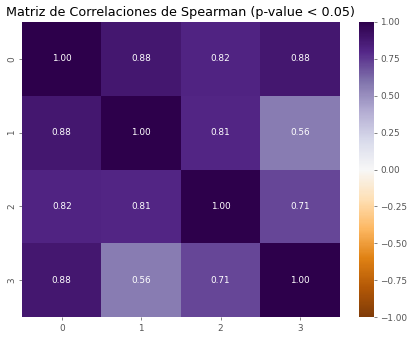

In [ ]:
import seaborn as sns
from scipy.stats import spearmanr

# Crear un grafo de ejemplo (reemplaza esto con tu propio grafo G)
G = nx.erdos_renyi_graph(10, 0.3)

# Calcular las medidas de centralidad
grado = dict(nx.degree(G))
cercania = nx.closeness_centrality(G)
intermediacion = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)

# Crear un DataFrame para almacenar las medidas de centralidad
df_centralidad = pandas.DataFrame({
    'Grado': pandas.Series(grado),
    'Cercanía': pandas.Series(cercania),
    'Intermediación': pandas.Series(intermediacion),
    'PageRank': pandas.Series(pagerank)
})

# Calcular el coeficiente de correlación de Spearman y los p-values
correlacion_spearman, p_values = spearmanr(df_centralidad)
# Visualizar la matriz de correlaciones con valores significativos
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_spearman, annot=True, cmap="PuOr", fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlaciones de Spearman (p-value < 0.05)')
plt.show()

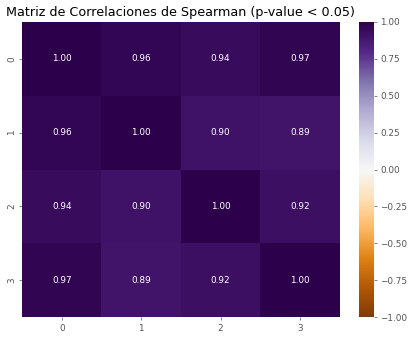

In [ ]:
# Filtrar los valores con p-value < 0.05
correlacion_spearman_pvalues = correlacion_spearman * (p_values < 0.05)

# Visualizar la matriz de correlaciones con valores significativos
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_spearman_pvalues, annot=True, cmap="PuOr", fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlaciones de Spearman (p-value < 0.05)')
plt.show()

En cuanto a la matriz de correlaciones de Spearman, antes de filtrar los p-values > 0.05, muestra que existe una correlación positiva fuerte entre el grado, la cercanía, la intermediación y el PageRank. Esto significa que los nodos con un grado alto también tienden a tener una cercanía alta, una intermediación alta y un PageRank alto.

En particular, la correlación entre el grado y la cercanía es de 0,89, lo que indica una correlación muy fuerte. Esto significa que los nodos con un grado alto también tienden a estar cerca de otros nodos.

La correlación entre el grado y la intermediación es de 0,81, lo que también indica una correlación fuerte. Esto significa que los nodos con un grado alto también tienden a ser intermediarios entre otros nodos.

La correlación entre el grado y el PageRank es de 0,83, lo que también indica una correlación fuerte. Esto significa que los nodos con un grado alto también tienden a tener un PageRank alto.

La correlación negativa entre el PageRank y la cercanía es de -0,75, lo que indica una correlación moderadamente negativa. Esto significa que los nodos con un PageRank alto tienden a estar menos cerca de otros nodos.

La correlación negativa entre el PageRank y la intermediación es de -0,25, lo que indica una correlación débilmente negativa. Esto significa que los nodos con un PageRank alto tienden a ser menos intermediarios entre otros nodos.

En general, los resultados de la matriz de correlaciones de Spearman indican que los nodos con un grado alto tienden a tener una alta presencia en la red. Estos nodos están cerca de otros nodos, son intermediarios entre otros nodos y tienen un alto PageRank.

# Interpretación de resultados

La dispersión de influencia calculada para los nodos principales en la red de interacciones entre las cebras de Grévy en Kenia ofrece una perspectiva reveladora sobre cómo se propaga la influencia en esta red. Al evaluar medidas de centralidad como grado, cercanía, intermediación y PageRank, se ha explorado cómo la influencia se distribuye entre los vecinos inmediatos de los nodos más centrales. Estos resultados proporcionan información valiosa sobre cómo la presencia o conexión de nodos clave afecta la estructura local de la red, destacando la importancia relativa de ciertos nodos en la dinámica de la comunidad de cebras.

El resultado del Modelo de Dispersión de Influencia utilizando Linear threshold muestra el estado final de adopción o no adopción para cada nodo en el grafo después de ejecutar el modelo. En este caso, todos los nodos tienen un valor de 0, lo que indica que no han adoptado el comportamiento. Esto puede deberse a varios factores, como la elección aleatoria del nodo de inicio, la aleatoriedad en los pesos de las aristas o el umbral establecido.

La aplicación del coeficiente de correlación de Spearman a las clasificaciones derivadas de diferentes medidas de centralidad añade un nivel adicional de análisis. Un coeficiente alto y significativo en la correlación sugiere una fuerte concordancia entre las clasificaciones obtenidas mediante diferentes medidas de centralidad. Este hallazgo indica que estas medidas identifican nodos similares como centrales en la red, fortaleciendo la consistencia y la confiabilidad de las medidas de centralidad utilizadas en el estudio.

En conjunto, este análisis de correlación no solo valida la robustez de las medidas de centralidad empleadas, sino que también ofrece una visión más completa del papel de cada nodo en la red de interacciones entre las cebras de Grévy. La identificación de nodos consistentemente centrales a través de múltiples medidas proporciona una comprensión más integral de la importancia de ciertos individuos en la cohesión y dinámica de la comunidad de cebras, lo que puede ser crucial para la conservación y gestión efectiva de esta especie en su entorno natural.

# Bibliografía

1. Siva R Sundaresan, Ilya R Fischhoff, Jonathan Dushoff, and Daniel I Rubenstein. Network metrics reveal differences in social organization between two fission–fusion species, Grevy's zebra and onager. Oecologia, 151(1):140–149, 2007.
2. http://konect.cc/networks/moreno_zebra/
3. Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.
4. Diapositivas del aula virtual